# 1. '도박' 키워드
- 2018~2022 현재까지 '도박' 키워드 중 '청소년'이 차지하는 비율 비교

In [66]:
from bs4 import BeautifulSoup 
import urllib
import urllib.request as rq
import pandas as pd

global news_df, keyword

def News(keyword, ex_keyword, num, start_date, end_date):
    global news_df, url,page_num
    
    keyword = urllib.parse.quote(keyword) #퍼센트인코딩 #URL에 문자를 표현하는 인코딩방법(URL에 한글이 섞이면 오류 발생)
    ex_keyword = urllib.parse.quote(ex_keyword) #퍼센트인코딩 #URL에 문자를 표현하는 인코딩방법(URL에 한글이 섞이면 오류 발생)
    
    news_df = pd.DataFrame(columns=['title','url']) 
    
    page_num=1
    i=0 #크롤링한 기사의 수
    while num > i:
        url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query='+keyword+ '+-' + ex_keyword + '&photo=3'+'&pd=3'+ '&ds='+start_date+'&de='+end_date+'&start='+str(page_num)
        html = rq.urlopen(url)
        bs = BeautifulSoup(html,'html.parser')
        texts = bs.find_all(class_='news_tit')

        for text in texts:
            news_df.loc[i,'title'] = text.get_text()
            news_df.loc[i,'url'] = text['href']
            i +=1
            if i == num:
                break
        page_num +=10
    return news_df

#검색키워드, 제외키워드, num, start_date, end_date
# News('도박','슈', 1000,'2018.01.01','2018.12.31') 
# News('도박','양현석', 1000,'2019.01.01','2019.12.31')
# News('도박',' ', 1000,'2020.01.01','2020.12.31')
# News('도박','이재명', 1000,'2021.01.01','2021.12.31')
News('도박','공무원', 500,'2022.01.01','2022.07.29')

,title,url
0,"“100배 수익”… 개미들, 도박처럼 코인선물 베팅",https://www.donga.com/news/article/all/2022072...
1,"강원랜드 도박중독 회복자, 직접 재배한 감자 지역 나눔 '훈훈'",http://www.kado.net/news/articleView.html?idxn...
2,도박장 된 게임 불법 사설서버... 리니지·바람의나라 등 다양,http://www.fnnews.com/news/202207041804526633
3,100만원 넣고 30배 먹는다…주식판 깨지자 도박판 열렸다,http://www.edaily.co.kr/news/newspath.asp?news...
4,"""도박사이트 운영자 무관용 처벌… 중독 예방 교육 병행"" [범람하는 불법도박...",http://www.fnnews.com/news/202206301803336103
...,...,...
495,[기고] 함께 볼링 치는 교회,http://news.kmib.co.kr/article/view.asp?arcid=...
496,가상자산 범죄 1위 '보이스피싱 사기'…특금법 시행에도 근절 어려워,http://www.etnews.com/20220419000166
497,"""불법체류자 범죄 뿌리 뽑는다"" 마약유통 등 국제범죄 집중단속",http://www.fnnews.com/news/202203301822383332
498,[강헌의 히스토리 인 팝스] [108] ‘파친코’와 일본의 벚꽃,https://www.chosun.com/opinion/specialist_colu...


In [67]:
import re
target = news_df['title'].values #Series.values = array
title_list = target.tolist() # array > list
text = ' '.join(title_list) #list들을 공백으로 구분해서 연결
text = re.sub('[^가-힣]+',' ',text) #한글 이외는 공백으로 대체

In [68]:
#konlpy(콘엘피) = 형태소 분석
from konlpy.tag import Okt
from collections import Counter
okt = Okt() #객체형성

morph = okt.pos(text) #형태소로 변환 #word= 단어 / tag=품사
morph

noun_list =[]
for word, tag in morph: #word= 단어 / tag=품사
    if(tag=='Noun') & (len(word)>1): #noun이고 단어가 1글자 이상인것(1글자는 보통 조사이기때문)
        noun_list.append(word)

count = Counter(noun_list) #단어별 숫자세주기

# 2018
# data18 =dict(count.most_common()) #빈도수 정리 내림차
# series = pd.Series(data18)

#2019
# data19 =dict(count.most_common()) #빈도수 정리 내림차
# series = pd.Series(data19)

#2020
# data20 =dict(count.most_common()) #빈도수 정리 내림차
# series = pd.Series(data20)

#2021
# data21 =dict(count.most_common()) #빈도수 정리 내림차
# series = pd.Series(data21)

#2022
data22 =dict(count.most_common()) #빈도수 정리 내림차
series = pd.Series(data22)

df=pd.DataFrame(series, columns=['cnt'])
df.head()



,cnt
도박,96
횡령,43
직원,32
투자,22
코인,19


## 2018

In [53]:
data18.pop('도박')
data18.pop('불법')
data18.pop('문제')

KeyError: '도박'

(-0.5, 1499.5, 999.5, -0.5)

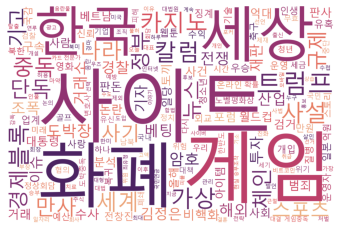

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

wordcloud = WordCloud(font_path='../visualization/dataset/malgun.ttf', background_color='white',
                     colormap='flare',width=1500,height=1000).generate_from_frequencies(data18)
plt.imshow(wordcloud)
plt.axis('off')

## 2019

In [32]:
data19.pop('도박')
data19.pop('불법')

48

(-0.5, 1499.5, 999.5, -0.5)

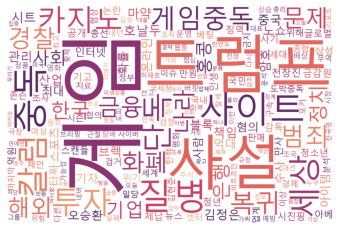

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

wordcloud = WordCloud(font_path='../visualization/dataset/malgun.ttf', background_color='white',
                     colormap='flare',width=1500,height=1000).generate_from_frequencies(data19)
plt.imshow(wordcloud)
plt.axis('off')

## 2020

In [45]:
data20.pop('도박')
data20.pop('불법')
data20.pop('만원')
data20.pop('단독')

(-0.5, 1499.5, 999.5, -0.5)

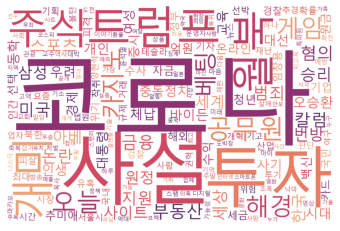

In [48]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

wordcloud = WordCloud(font_path='../visualization/dataset/malgun.ttf', background_color='white',
                     colormap='flare',width=1500,height=1000).generate_from_frequencies(data20)
plt.imshow(wordcloud)
plt.axis('off')

## 2021

In [60]:
data21.pop('도박')
data21.pop('불법')
# data21.pop('만원')

24

(-0.5, 1499.5, 999.5, -0.5)

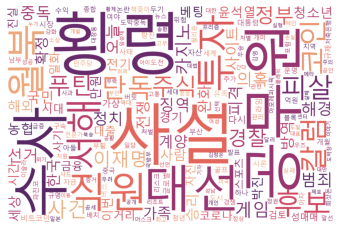

In [61]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

wordcloud = WordCloud(font_path='../visualization/dataset/malgun.ttf', background_color='white',
                     colormap='flare',width=1500,height=1000).generate_from_frequencies(data21)
plt.imshow(wordcloud)
plt.axis('off')

## 2022

In [65]:
url

'https://search.naver.com/search.naver?where=news&sm=tab_jum&query=%EB%8F%84%EB%B0%95+-%20&photo=3&pd=3&ds=2022.01.01&de=2022.07.29&start=941'

In [69]:
data22.pop('도박')
data22.pop('불법')
# data21.pop('만원')

19

(-0.5, 1499.5, 999.5, -0.5)

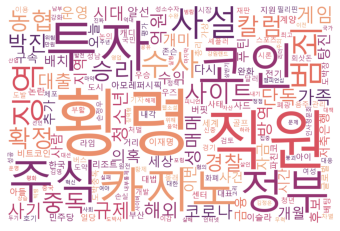

In [70]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

wordcloud = WordCloud(font_path='../visualization/dataset/malgun.ttf', background_color='white',
                     colormap='flare',width=1500,height=1000).generate_from_frequencies(data22)
plt.imshow(wordcloud)
plt.axis('off')